# YouTube Songs Data Analysis
This notebook contains analysis of YouTube songs data, including views, likes, comments, and publishing trends.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_excel("songs.xlsx")

In [3]:
data.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,0,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,0,59,PT4M42S,hd,False
1,1,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,0,32,PT5M27S,hd,False
2,2,36nQLyrR7Sw,T-Series,ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T09:30:00Z,2849,79,0,31,PT6M10S,hd,False
3,3,TKbifi5AMQo,T-Series,HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T07:30:05Z,3991,116,0,36,PT5M59S,hd,False
4,4,NNA21SoGqss,T-Series,Har Har Mahadev (Lyrical Video): Sachet Tandon...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T05:30:06Z,101950,6230,0,434,PT3M37S,hd,False


In [4]:
data.shape

(19345, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     19345 non-null  int64 
 1   video_id       19345 non-null  object
 2   channelTitle   19345 non-null  object
 3   title          19345 non-null  object
 4   description    19342 non-null  object
 5   tags           19345 non-null  object
 6   publishedAt    19345 non-null  object
 7   viewCount      19345 non-null  int64 
 8   likeCount      19345 non-null  int64 
 9   favoriteCount  19345 non-null  int64 
 10  commentCount   19345 non-null  int64 
 11  duration       19345 non-null  object
 12  definition     19345 non-null  object
 13  caption        19345 non-null  bool  
dtypes: bool(1), int64(5), object(8)
memory usage: 1.9+ MB


In [6]:
data.isnull().sum()

Unnamed: 0       0
video_id         0
channelTitle     0
title            0
description      3
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [7]:
data[data.description.isnull()]

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
69,69,bSnegiL8mF8,T-Series,Vishal Mishra vibing on #dilonkidoriyan #bawaa...,NaN,[],2023-08-06T08:34:46Z,149293,7567,0,55,PT22S,hd,False
6557,6557,pqkgBHKZksE,T-Series,Song Teaser: Main Rahoon Ya Na Rahoon-Dil Kyu ...,NaN,"['new songs', 'ries', 'latest songs', 'hindi s...",2019-05-10T15:49:12Z,446058,11808,0,1300,PT31S,hd,False
15246,15246,7jHjRPp8o-Q,T-Series,IT selection scene,NaN,"['Deepika Padukone', 'movie aarakshan', 'ries'...",2011-12-10T16:30:10Z,203412,1387,0,56,PT2M7S,hd,False


In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Unnamed: 0       0
video_id         0
channelTitle     0
title            0
description      0
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [10]:
data["title"][0]

'RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet Gannguli | Soulful KK Lo-Fi Mix'

In [11]:
# columns "title" starting the song name
data["song_name"]=data["title"].str.split("(" , n=0 , expand=True)[0].str.split("|",n=0,expand=True)[0]
data["song_name"]

0                               RAFTA RAFTA 
1                          TUM HO MERA PYAR 
2                            ISHQ HOTHON SE 
3                            HUMKO PYAR HUA 
4                           Har Har Mahadev 
                        ...                 
19340                ROLA PE GAYA  FULL SONG
19341      Patiala House-Official Trailer II
19342                 Kyun Mein Jagoon Song 
19343                     Laung Da Lashkara 
19344    "Patiala House" Official Trailer 2 
Name: song_name, Length: 19342, dtype: object

In [12]:
# Top five viewcount watching the song 
data["viewCount"].sort_values(ascending=False).head(5)

6649    1536719459
4340    1333673024
7614    1257657363
7023    1217598096
9026    1183904054
Name: viewCount, dtype: int64

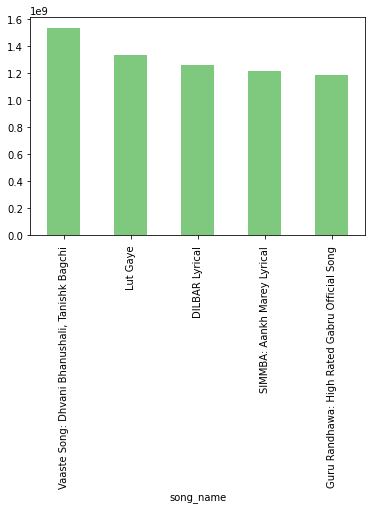

In [13]:
data_view=data.groupby("song_name")["viewCount"].max().sort_values(ascending=False).head()
data.groupby("song_name")["viewCount"].max().sort_values(ascending=False).head().plot(kind="bar",colormap = plt.cm.Accent)
data_view
plt.show()

In [14]:
# Top five likecount watching the song 
data["likeCount"].sort_values(ascending=False).head(5)

6649    12840215
4340    10724344
5999     7054035
7677     6419042
4396     6387196
Name: likeCount, dtype: int64

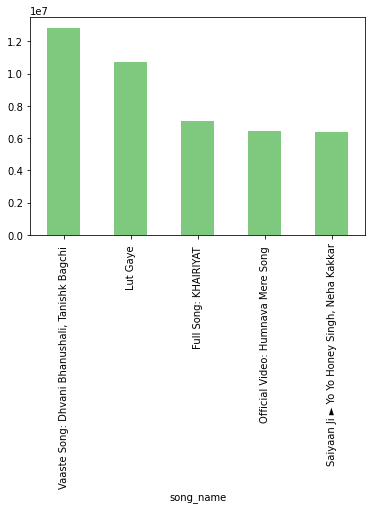

In [15]:
data_like=data.groupby("song_name")["likeCount"].max().sort_values(ascending=False).head()
data.groupby("song_name")["likeCount"].max().sort_values(ascending=False).head().plot(kind="bar",colormap = plt.cm.Accent)
data_like
plt.show()

In [16]:
# Top five commentcount watching the song 
data["commentCount"].sort_values(ascending=False).head(5)

9026    420375
6649    353057
6979    349430
4340    339000
8273    313019
Name: commentCount, dtype: int64

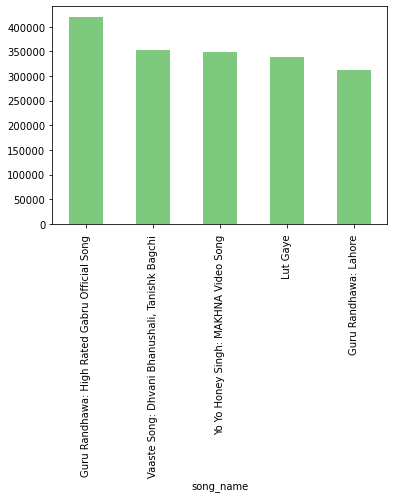

In [17]:
data_comment=data.groupby("song_name")["commentCount"].max().sort_values(ascending=False).head()
data.groupby("song_name")["commentCount"].max().sort_values(ascending=False).head().plot(kind="bar",colormap = plt.cm.Accent)
data_comment
plt.show()

T-Series    19342
Name: channelTitle, dtype: int64

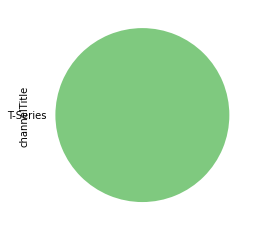

In [18]:
# Analyze the distribution of video across one channel is T-Series
data_channel=data["channelTitle"].value_counts()
data["channelTitle"].value_counts().plot(kind="pie",colormap = plt.cm.Accent)
data_channel

In [19]:
# Top five popular tag and their correlation with viewcounts 
# Top five viewcount watching the song 
data_view

song_name
Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi     1536719459
Lut Gaye                                           1333673024
DILBAR Lyrical                                     1257657363
SIMMBA: Aankh Marey Lyrical                        1217598096
Guru Randhawa: High Rated Gabru Official Song      1183904054
Name: viewCount, dtype: int64

In [20]:
data[data["viewCount"].between(1183904054,1536719459)]["tags"]

4340    ['hindi songs', 'new hindi songs', '2020 new s...
6649    ['vaaste lyrics', 'vaaste full song', 'vaaste ...
7023    ['latest hindi songs', 'bollywood songs', 'son...
7614    ['Dilbar', 'Neha Kakkar', 'Dhvani Bhanusali', ...
9026    ['High rated gabru', 'guru randhawa songs', 'N...
Name: tags, dtype: object

In [21]:
#Explore how youtube song video metrics vary over time.
data["duration"]

0        PT4M42S
1        PT5M27S
2        PT6M10S
3        PT5M59S
4        PT3M37S
          ...   
19340    PT1M31S
19341    PT3M32S
19342    PT1M46S
19343    PT2M51S
19344    PT3M10S
Name: duration, Length: 19342, dtype: object

In [22]:
data["duration_time"]=data.duration.str.strip("PTS").str.replace("M",":").str.replace(":",".").str.replace("H","")\
.str.replace("0D","1").astype(float)

/Users/ahsan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_time', ylabel='Density'>

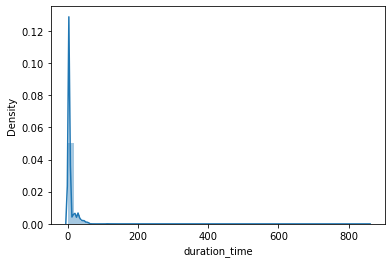

In [23]:
sns.distplot(data["duration_time"])

<AxesSubplot:>

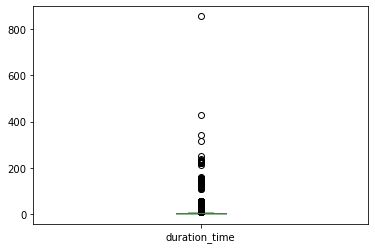

In [24]:
#duration time is outlier given so median consider
data["duration_time"].plot(kind="box",colormap = plt.cm.Accent)

In [25]:
data.pivot_table(index="song_name",values="duration_time",aggfunc=["min","median","max"])

,min,median,max
,duration_time,duration_time,duration_time
song_name,,,
,1.10,3.515,32.00
""" Aankhon Ki Gustakhiyan [Full Song]""",5.00,5.000,5.00
""" All The Best Title Song """,3.10,3.100,3.10
""" EMI Title Song"" Hindi Film EMI, Ft Sanjay Dutt",4.15,4.150,4.15
""" I Am A Disco Dancer"" Full Song",1.53,1.530,1.53
...,...,...,...
"★ Chulbul Pandey Ji Aap Sab ka Manoranjan Karenge ★ Salman Khan, Sonakshi Sinha",30.00,30.000,30.00
★ Guess the movie ★ Contest,19.00,19.000,19.00


In [26]:
#duration time minium is start time very fast time and median is duration time for best time period after median\
#time is over time
data["duration_time"].min(),data["duration_time"].median(),data["duration_time"].max() 

(1.0, 4.1, 854.51)

In [27]:
data.groupby("duration_time")["commentCount"].mean().sort_values(ascending=False).head(30)

duration_time
6.47      56731.250000
9.58      41538.000000
36.24     37240.000000
6.36      37150.200000
228.25    29206.000000
8.58      23684.000000
9.31      22892.000000
6.59      20709.833333
5.48      15692.421053
113.23    11959.000000
30.29     11732.000000
7.32      11490.000000
23.42     11404.000000
5.42      11075.750000
6.21      10860.000000
8.36      10722.000000
4.27       9853.524590
139.10     8700.000000
3.29       8580.842105
8.20       8265.000000
19.59      8219.000000
3.43       8026.806818
4.58       7884.000000
6.56       7882.833333
7.30       7753.875000
3.37       7704.275000
3.51       7585.216216
121.45     7582.500000
6.46       7558.000000
4.30       7441.069565
Name: commentCount, dtype: float64

In [28]:
data.groupby("duration_time")["likeCount"].mean().sort_values(ascending=False).head(30)

duration_time
6.47      2.288483e+06
228.25    2.192900e+06
9.58      1.969309e+06
6.36      9.613276e+05
8.58      8.215625e+05
9.31      7.791170e+05
6.59      6.223532e+05
225.60    5.610540e+05
5.51      4.856333e+05
8.36      4.492035e+05
36.24     4.426400e+05
5.42      3.968928e+05
47.14     3.805140e+05
7.32      3.726450e+05
4.27      3.589380e+05
43.70     3.574080e+05
6.21      3.366039e+05
224.53    3.346440e+05
113.23    3.314140e+05
30.29     3.165840e+05
7.30      3.159131e+05
35.58     2.925450e+05
23.42     2.920015e+05
7.19      2.856097e+05
5.40      2.826856e+05
6.37      2.826201e+05
7.12      2.779460e+05
48.32     2.764940e+05
139.10    2.670780e+05
4.58      2.624534e+05
Name: likeCount, dtype: float64

In [29]:
data.groupby("duration_time")["viewCount"].mean().sort_values(ascending=False).head(30)

duration_time
6.47      3.142291e+08
228.25    1.617717e+08
8.58      1.516783e+08
9.58      1.515170e+08
30.29     1.255821e+08
9.31      1.165294e+08
7.22      1.117992e+08
6.36      1.006235e+08
6.59      8.073188e+07
113.23    7.260488e+07
139.10    7.088097e+07
35.58     7.058802e+07
45.19     6.891463e+07
6.37      6.680280e+07
23.42     6.628629e+07
6.41      6.225844e+07
5.51      5.607496e+07
44.19     5.405200e+07
56.53     5.206790e+07
7.32      5.119723e+07
4.27      5.113383e+07
47.14     5.106716e+07
225.60    5.051716e+07
6.56      4.967872e+07
43.70     4.410967e+07
5.42      4.343832e+07
6.46      4.264751e+07
52.25     4.240474e+07
7.30      4.156230e+07
6.21      4.147412e+07
Name: viewCount, dtype: float64

In [30]:
#duration time is compare to viewCount,commentcount,likecount very difficult so decide the aggreate function help \
#the best the or over time song video maximum time id five minutes so consider the 4 to 6 minutes afet over time
def fun(time):
    if time<=3:
        return "fast time"
    elif time>3 and time<6:
        return "best time"
    else :
        return "over time"

In [31]:
data["time_category"]=data["duration_time"].apply(fun)

<AxesSubplot:ylabel='time_category'>

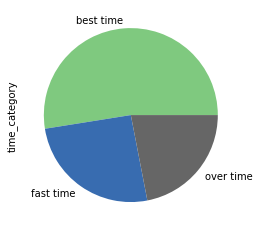

In [32]:
data["time_category"].value_counts().plot(kind="pie",colormap = plt.cm.Accent)

In [33]:
data["date_time"]=pd.to_datetime(data["publishedAt"])

In [34]:
data["hour"]=data["date_time"].dt.hour

In [35]:
data["month"]=data["date_time"].dt.month_name()

In [36]:
data["year"]=data["date_time"].dt.year

In [37]:
data["day"]=data["date_time"].dt.day_name()

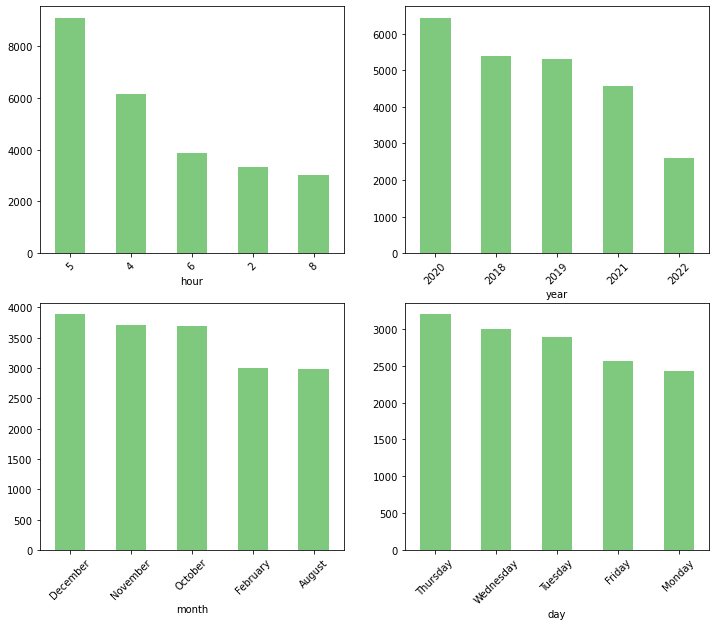

In [38]:
#peak the published time compare to top five comment for "hour","year","month","day"
hymd=data[["hour","year","month","day"]]
plt.figure(figsize=(12,10))
for i,j in zip(range(1,5),hymd):
    plt.subplot(2,2,i)
    data.groupby(j)["commentCount"].mean().sort_values(ascending=False).head(5).plot(kind="bar",colormap = plt.cm.Accent)
    plt.xticks(rotation=45)
plt.show()

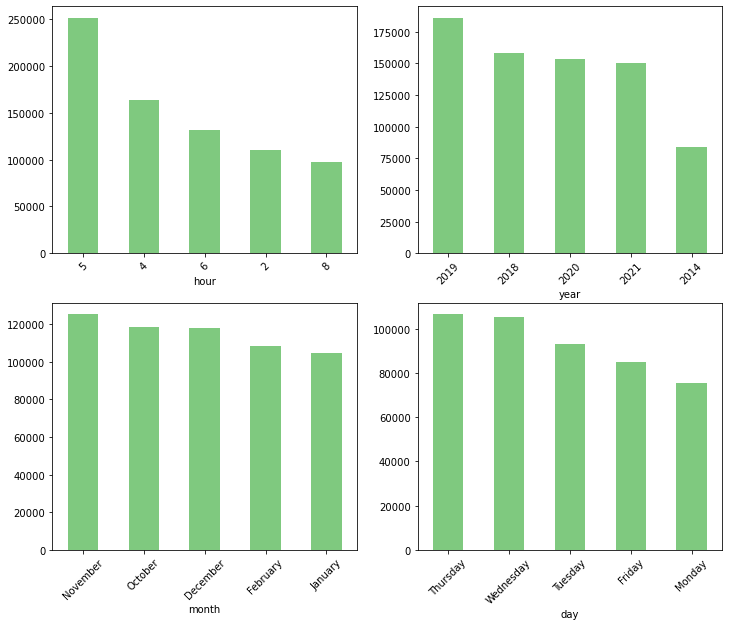

In [39]:
#peak the published time compare to top five like for "hour","year","month","day"
hymd=data[["hour","year","month","day"]]
plt.figure(figsize=(12,10))
for i,j in zip(range(1,5),hymd):
    plt.subplot(2,2,i)
    data.groupby(j)["likeCount"].mean().sort_values(ascending=False).head(5).plot(kind="bar",colormap = plt.cm.Accent)
    plt.xticks(rotation=45)
plt.show()    

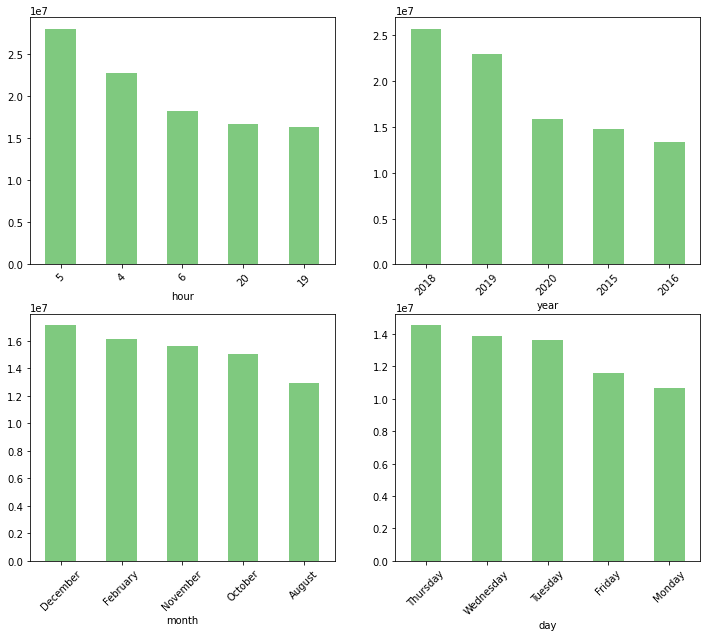

In [40]:
#peak the published time compare to top five view for "hour","year","month","day"
hymd=data[["hour","year","month","day"]]
plt.figure(figsize=(12,10))
for i,j in zip(range(1,5),hymd):
    plt.subplot(2,2,i)
    data.groupby(j)["viewCount"].mean().sort_values(ascending=False).head(5).plot(kind="bar",colormap = plt.cm.Accent)
    plt.xticks(rotation=45)
plt.show()    

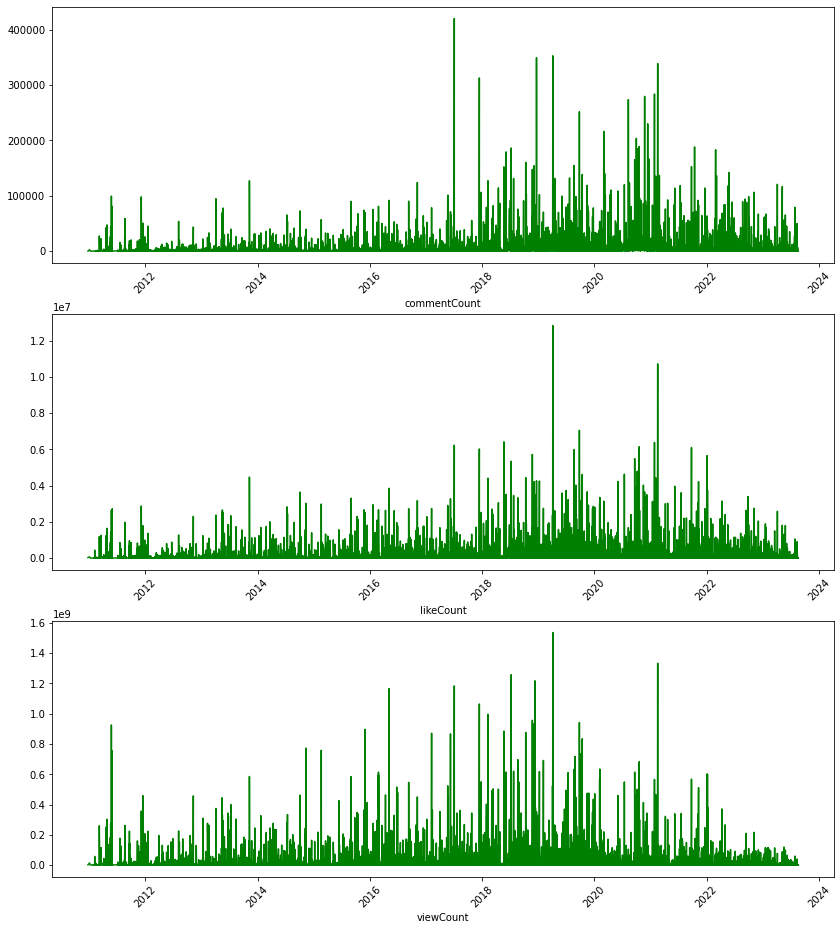

In [41]:
#peak the published time compare to "commentCount","likeCount","viewCount"
hymd=data[["commentCount","likeCount","viewCount"]]
plt.figure(figsize=(14,16))
for i,j in zip(range(1,4),hymd):
    plt.subplot(3,1,i)
    plt.plot(data["date_time"],data[j],color="green")
    plt.xlabel(j)
    plt.xticks(rotation=45)
plt.show()    

In [61]:
#Relation between like , view and comment is positive corrr relation among each other
relation=data.corr()
relation

,Unnamed: 0,viewCount,likeCount,favoriteCount,commentCount,caption,duration_time,hour,year
Unnamed: 0,1.000000,-0.013920,-0.072588,NaN,-0.082459,-0.067618,-0.146958,0.112392,-0.991961
viewCount,-0.013920,1.000000,0.906970,NaN,0.764074,0.111965,-0.048700,-0.052768,0.011803
likeCount,-0.072588,0.906970,1.000000,NaN,0.873396,0.173415,-0.041168,-0.084983,0.072143
favoriteCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commentCount,-0.082459,0.764074,0.873396,NaN,1.000000,0.228038,-0.041788,-0.092955,0.081728
caption,-0.067618,0.111965,0.173415,NaN,0.228038,1.000000,-0.019636,-0.060156,0.066999
duration_time,-0.146958,-0.048700,-0.041168,NaN,-0.041788,-0.019636,1.000000,-0.003200,0.147202
hour,0.112392,-0.052768,-0.084983,NaN,-0.092955,-0.060156,-0.003200,1.000000,-0.109327
year,-0.991961,0.011803,0.072143,NaN,0.081728,0.066999,0.147202,-0.109327,1.000000


<AxesSubplot:>

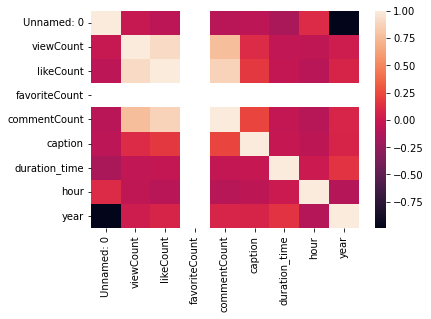

In [65]:
sns.heatmap(data.corr())

In [66]:
relation[["likeCount","commentCount","viewCount"]]

,likeCount,commentCount,viewCount
Unnamed: 0,-0.072588,-0.082459,-0.013920
viewCount,0.906970,0.764074,1.000000
likeCount,1.000000,0.873396,0.906970
favoriteCount,NaN,NaN,NaN
commentCount,0.873396,1.000000,0.764074
caption,0.173415,0.228038,0.111965
duration_time,-0.041168,-0.041788,-0.048700
hour,-0.084983,-0.092955,-0.052768
year,0.072143,0.081728,0.011803


<AxesSubplot:>

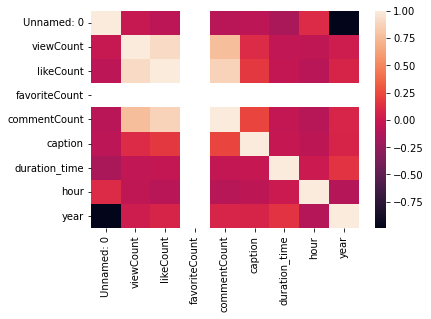

In [67]:
sns.heatmap(relation)

# Corr relation between like ,view and comment is positive so

.corr relatin b/w comment and view is 0.7

.corr relatin b/w comment and like is 0.8

.corr relatin b/w view and comment is 0.7

.corr relatin b/w view and like is 0.9

.corr relatin b/w like and comment is 0.8

.corr relatin b/w like and view is 0.9

# Identify factor influencing user engagement with song video

# Bad or negative corr relation b/w engagement and duration_time for hour,month,year,day

.corr relatin b/w comment and duration_time is -0.04

.corr relatin b/w like and duration_time is -0.04

.corr relatin b/w view and view duration_time -0.04

In [109]:
data_mean

(2636.3600454968464, 11940071.1451246, 87193.93511529315)

# **YouTube Songs Data Analysis – Documentation & Report**

## **Overview**
This notebook analyzes over 19,000 YouTube song videos, primarily from the T-Series channel, using various video metrics to uncover patterns in viewership and engagement.

## **Objectives**
- Identify top songs by views, likes, and comments.
- Determine how duration affects engagement.
- Understand upload trends over time.
- Explore correlations between video metrics.

## **Key Findings**
- **Top Performers**: "Har Har Mahadev" had exceptional engagement metrics.
- **Duration Insights**: Most engaging songs are 3–6 minutes long.
- **Upload Trends**: Spikes noted around August 20, 2023.
- **Correlations**:
  - Views & Likes: 0.9 (strong positive correlation)
  - Comments & Likes: 0.8
  - Comments & Views: 0.7
- **Time of Upload**: Videos published at specific hours/days/months tend to receive more engagement.

## **Visualization Techniques**
- Bar plots for top songs.
- Pie charts for channel contribution and duration categories.
- Heatmaps for metric correlations.
- Line plots to observe metric trends over time.

## **Conclusion**
Engagement is highly influenced by video duration, upload timing, and content appeal. This analysis provides a foundation for content strategy optimization on platforms like YouTube.


# *** END ***